# Вариант №10

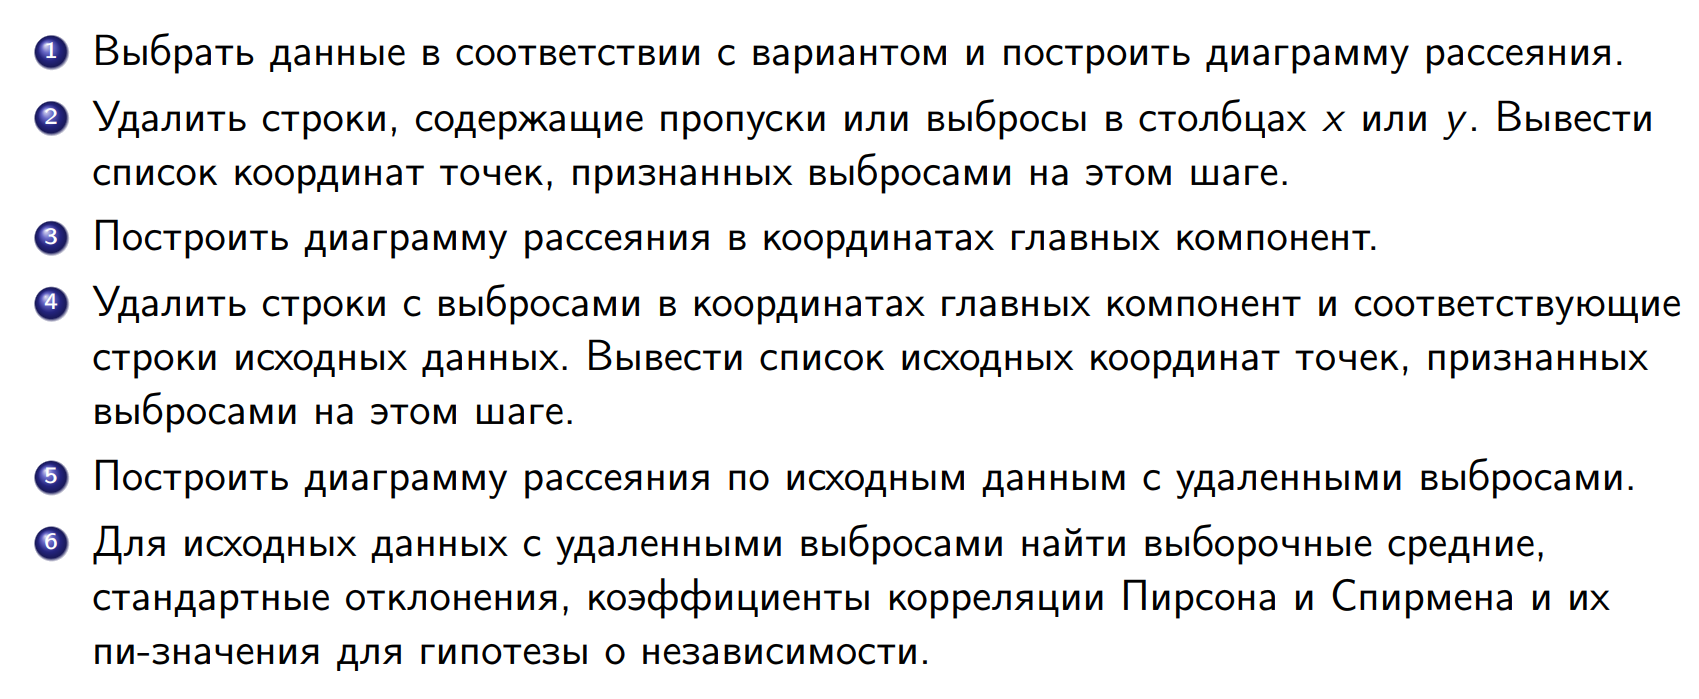

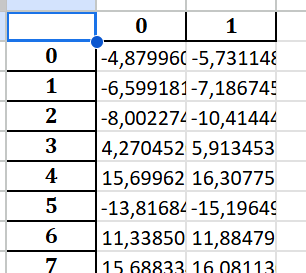

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Выбрать данные в соответствии с вариантом и построить диаграмму рассеяния.

In [10]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Семинар 7.xlsx', sheet_name='10', names=['-', 'x', 'y']).drop('-', axis=1)
data

,x,y
0,-4.879961,-5.731149
1,-6.599182,-7.186746
2,-8.002274,-10.414443
3,4.270452,5.913454
4,15.699627,16.307753
...,...,...
995,4.700826,2.749287
996,8.044238,7.550891
997,19.167064,24.478110
998,12.184110,13.129870


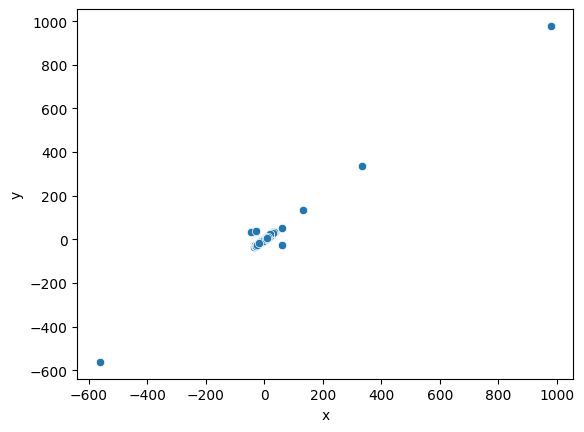

In [11]:
sns.scatterplot(x=data['x'], y=data['y'])
plt.show()

# Удалить строки, содержащие пропуски или выбросы в столбцах x или y. Вывести список координат точек, признанных выбросами на этом шаге.


In [12]:
# пропуски
data = data.dropna(how='any')
data_clean = data.copy()


# выбросы по x
array=data_clean.to_numpy()
q_025 = np.quantile(array[:, 0], 0.25)
q_075 = np.quantile(array[:, 0], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

print('Верхняя граница x =', upper_limit)
print('Нижняя граница x =', lower_limit)

emissions_x = data_clean[(data_clean['x'] > upper_limit) | (data_clean['x'] < lower_limit)].index
data_clean = data_clean.drop(emissions_x)
print('Индексы выбросов по x: ', emissions_x, '\n')


# выбросы по y
array=data_clean.to_numpy()
q_025 = np.quantile(array[:, 1], 0.25)
q_075 = np.quantile(array[:, 1], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

print('Верхняя граница y =', upper_limit)
print('Нижняя граница y =', lower_limit)

emissions_y = data_clean[(data_clean['y'] > upper_limit) | (data_clean['y'] < lower_limit)].index
data_clean = data_clean.drop(emissions_y)
print('Индексы выбросов по y: ', emissions_y, '\n')


# вывод точек, признанных выбросами
print('выбросы:')
emissions = np.append(emissions_x, emissions_y)
data.loc[emissions]

Верхняя граница x = 34.704754443112364
Нижняя граница x = -33.27388799894507
Индексы выбросов по x:  Index([163, 216, 391, 396, 423, 635, 673, 703, 767, 792, 815], dtype='int64') 

Верхняя граница y = 34.54273018511399
Нижняя граница y = -33.39885137580505
Индексы выбросов по y:  Index([688, 838], dtype='int64') 

выбросы:


,x,y
163,35.820732,33.828930
216,130.953760,133.209092
391,979.141357,978.034414
396,-44.391168,35.266470
423,-33.951705,-33.448673
635,34.780006,31.604415
673,335.130806,336.344521
703,34.813034,33.763720
767,62.069406,-27.479855
792,-561.879752,-561.339957


# Построить диаграмму рассеяния в координатах главных компонент

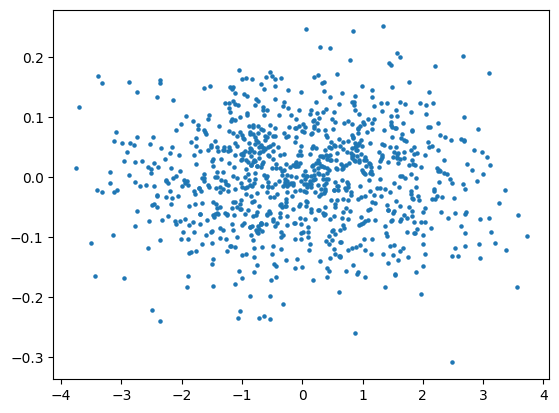

In [13]:
sc = StandardScaler()
sc.fit(data_clean.astype('float64'))
Xsc = sc.transform(data_clean.astype('float64'))
Xsc = pd.DataFrame(Xsc, index=data_clean.index, columns=data_clean.columns)

mean = np.mean(Xsc.values, axis=0)
cov = (Xsc - mean).T.dot((Xsc - mean)/(Xsc.shape[0]-1))

eig_vals, eig_vecs = np.linalg.eig(cov)

u, s, v = np.linalg.svd(cov)

skpcamod = PCA().fit(X = Xsc)

scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:,:2])
scores_skl.columns = ['PC1','PC2']
plt.scatter(data = scores_skl, x = 'PC1', y = 'PC2', s = 5)
plt.show()

# Удалить строки с выбросами в координатах главных компонент и соответствующие строки исходных данных. Вывести список исходных координат точек, признанных выбросами на этом шаге.

In [14]:
scores_svd = pd.DataFrame(data_clean @ u[:,:2])
scores_svd.columns = ['PC1','PC2']
x_array = scores_svd['PC1'].to_numpy()
y_array = scores_svd['PC2'].to_numpy()

# выбросы по x
q_025 = np.quantile(x_array, 0.25)
q_075 = np.quantile(x_array, 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

emissions_x = scores_svd[(scores_svd['PC1'] > upper_limit) | (scores_svd['PC1'] < lower_limit)].index
scores_svd = scores_svd.drop(emissions_x)
print('Индексы выбросов по x: ', emissions_x, '\n')


# выбросы по y
q_025 = np.quantile(y_array, 0.25)
q_075 = np.quantile(y_array, 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

emissions_y = scores_svd[(scores_svd['PC2'] > upper_limit) | (scores_svd['PC2'] < lower_limit)].index
scores_svd = scores_svd.drop(emissions_y)
print('Индексы выбросов по y: ', emissions_y, '\n')


# вывод точек, признанных выбросами
print('выбросы:')
emissions = np.append(emissions_x, emissions_y)
data_clean.loc[emissions]

Индексы выбросов по x:  Index([], dtype='int64') 

Индексы выбросов по y:  Index([129, 186, 306, 321, 366, 400, 510, 720, 940, 997], dtype='int64') 

выбросы:


,x,y
129,2.980336,-1.255893
186,-22.010770,-17.883100
306,14.075750,9.764379
321,-7.738066,-3.685828
366,-10.821179,-6.771149
400,-6.179987,-2.101418
510,9.722363,5.530471
720,5.672482,10.153325
940,-7.048292,-3.064085
997,19.167064,24.478110


# Построить диаграмму рассеяния по исходным данным с удаленными выбросами.

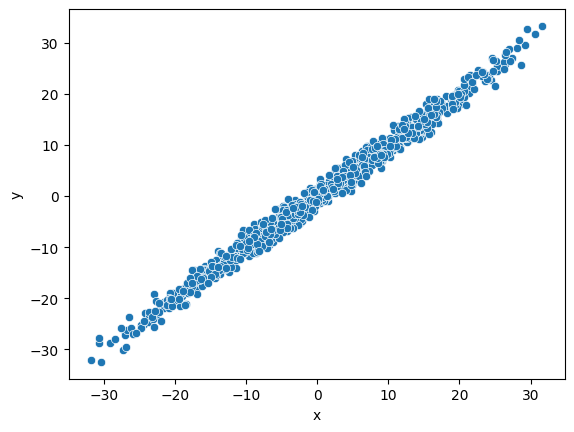

In [15]:
data_clean = data_clean.drop(emissions)
sns.scatterplot(x=data_clean['x'], y=data_clean['y'])
plt.show()

# Для исходных данных с удаленными выбросами найти выборочные средние, стандартные отклонения, коэффициенты корреляции Пирсона и Спирмена и их пи-значения для гипотезы о независимости.


In [16]:
print('среднее х =', round(data_clean['x'].mean(), 4), '  среднее y =', round(data_clean['y'].mean(), 4))
print('стандартное оклонение x =', round(data_clean['x'].std(), 4), '  стандартное оклонение y =', round(data_clean['y'].std(), 4))
print('коэффициент корреляции Пирсона =', stats.pearsonr(data_clean['x'], data_clean['y'])[0], '  pi-значение =', stats.pearsonr(data_clean['x'], data_clean['y'])[1])
print('коэффициент корреляции Спирмена =', stats.spearmanr(data_clean['x'], data_clean['y'])[0], '  pi-значение =', stats.spearmanr(data_clean['x'], data_clean['y'])[1])

среднее х = 0.4054   среднее y = 0.3885
стандартное оклонение x = 12.1771   стандартное оклонение y = 12.1859
коэффициент корреляции Пирсона = 0.9934366502720747   pi-значение = 0.0
коэффициент корреляции Спирмена = 0.9929589655090567   pi-значение = 0.0
